In [ ]:
# NEW DATASET: https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020?resource=download


In [131]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import shapely
import matplotlib.colors as colors
from IPython.display import clear_output
import time

In [124]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/xt/52zb2sgj4q9f84tyf9cg1yf00000gn/T/ipykernel_53191/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
fires = pd.read_csv("/Users/christopher/Documents/California_Fire_Incidents.csv")

In [4]:
fires.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


1464

In [26]:
fires.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [10]:
jsonfile = ('/Users/christopher/Downloads/ark28722-s73w23-geojson.json')
world = geopandas.read_file(jsonfile)

/Users/christopher/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


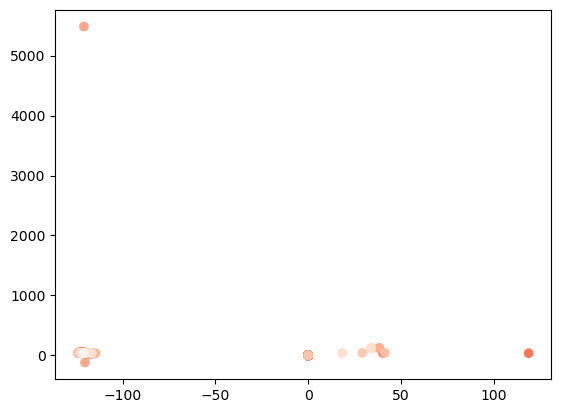

In [25]:
# ax = world.plot(color = "none",edgecolor = 'black', figsize = (10,10))
plt.scatter(fires["Longitude"], fires["Latitude"], c=np.log(fires["AcresBurned"]), cmap="Reds")
plt.show()

In [67]:
fires_select = fires[(fires.Latitude < 44) & (fires.Latitude > 30) & (fires.Longitude < -113)]
fires_select = fires_select[~fires_select["AcresBurned"].isnull()]
fires_select["AcresBurned"].replace(to_replace = 0, value = 1, inplace=True)

In [68]:
x = list(fires_select["AcresBurned"]).copy()

In [69]:
x.sort()

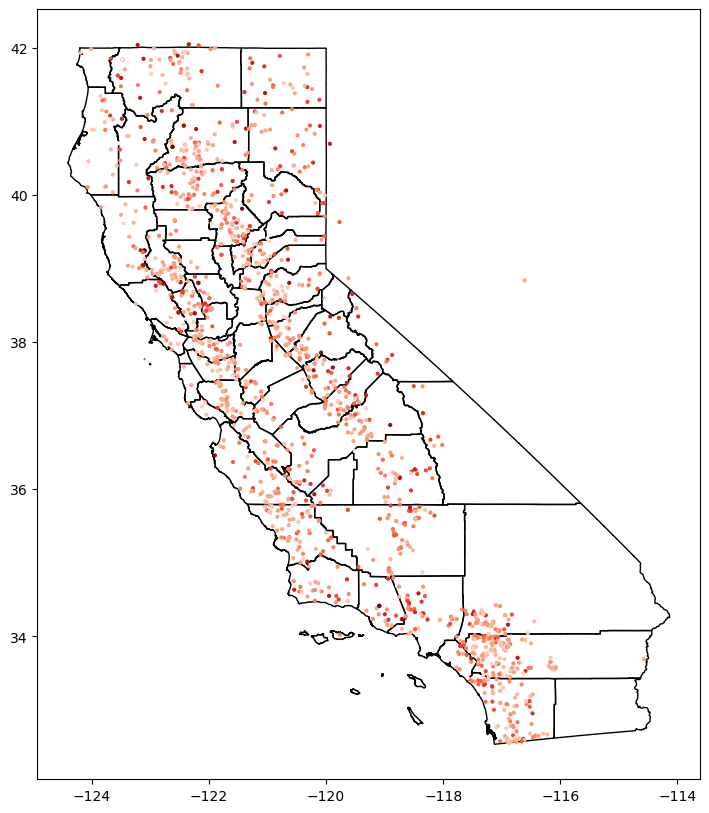

In [71]:
ax = world.plot(color = "none",edgecolor = 'black', figsize = (10,10))
plt.scatter(fires_select["Longitude"], fires_select["Latitude"], c=np.log(fires_select["AcresBurned"]), cmap="Reds", s=4)
plt.show()

In [72]:
outlier = fires_select[fires_select.CanonicalUrl=='/incidents/2013/8/6/tram-fire/']
print('Outlier Lon/Lat:\n', outlier.Longitude, "\n", outlier.Latitude)
fires_select = fires_select[fires_select.CanonicalUrl!='/incidents/2013/8/6/tram-fire/']

Outlier Lon/Lat:
 113   -116.61
Name: Longitude, dtype: float64 
 113    38.838
Name: Latitude, dtype: float64


In [73]:
fire_gdf = geopandas.GeoDataFrame(
    fires_select, geometry=geopandas.points_from_xy(fires_select.Longitude, fires_select.Latitude), crs="EPSG:4326"
)

In [134]:
xmin, ymin, xmax, ymax= (-125,32,-113,42)
n_cells=655.5
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = fire_gdf.crs
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

In [135]:
points = np.array((fires_select["Longitude"], fires_select["Latitude"])).T
values = np.array(fire_gdf['AcresBurned'])
xi = np.array((cell["geometry"].to_crs('epsg:4326').centroid.x, cell["geometry"].to_crs('epsg:4326').centroid.y)).T

/var/folders/xt/52zb2sgj4q9f84tyf9cg1yf00000gn/T/ipykernel_53191/1652187795.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xi = np.array((cell["geometry"].to_crs('epsg:4326').centroid.x, cell["geometry"].to_crs('epsg:4326').centroid.y)).T


<IPython.core.display.Javascript object>


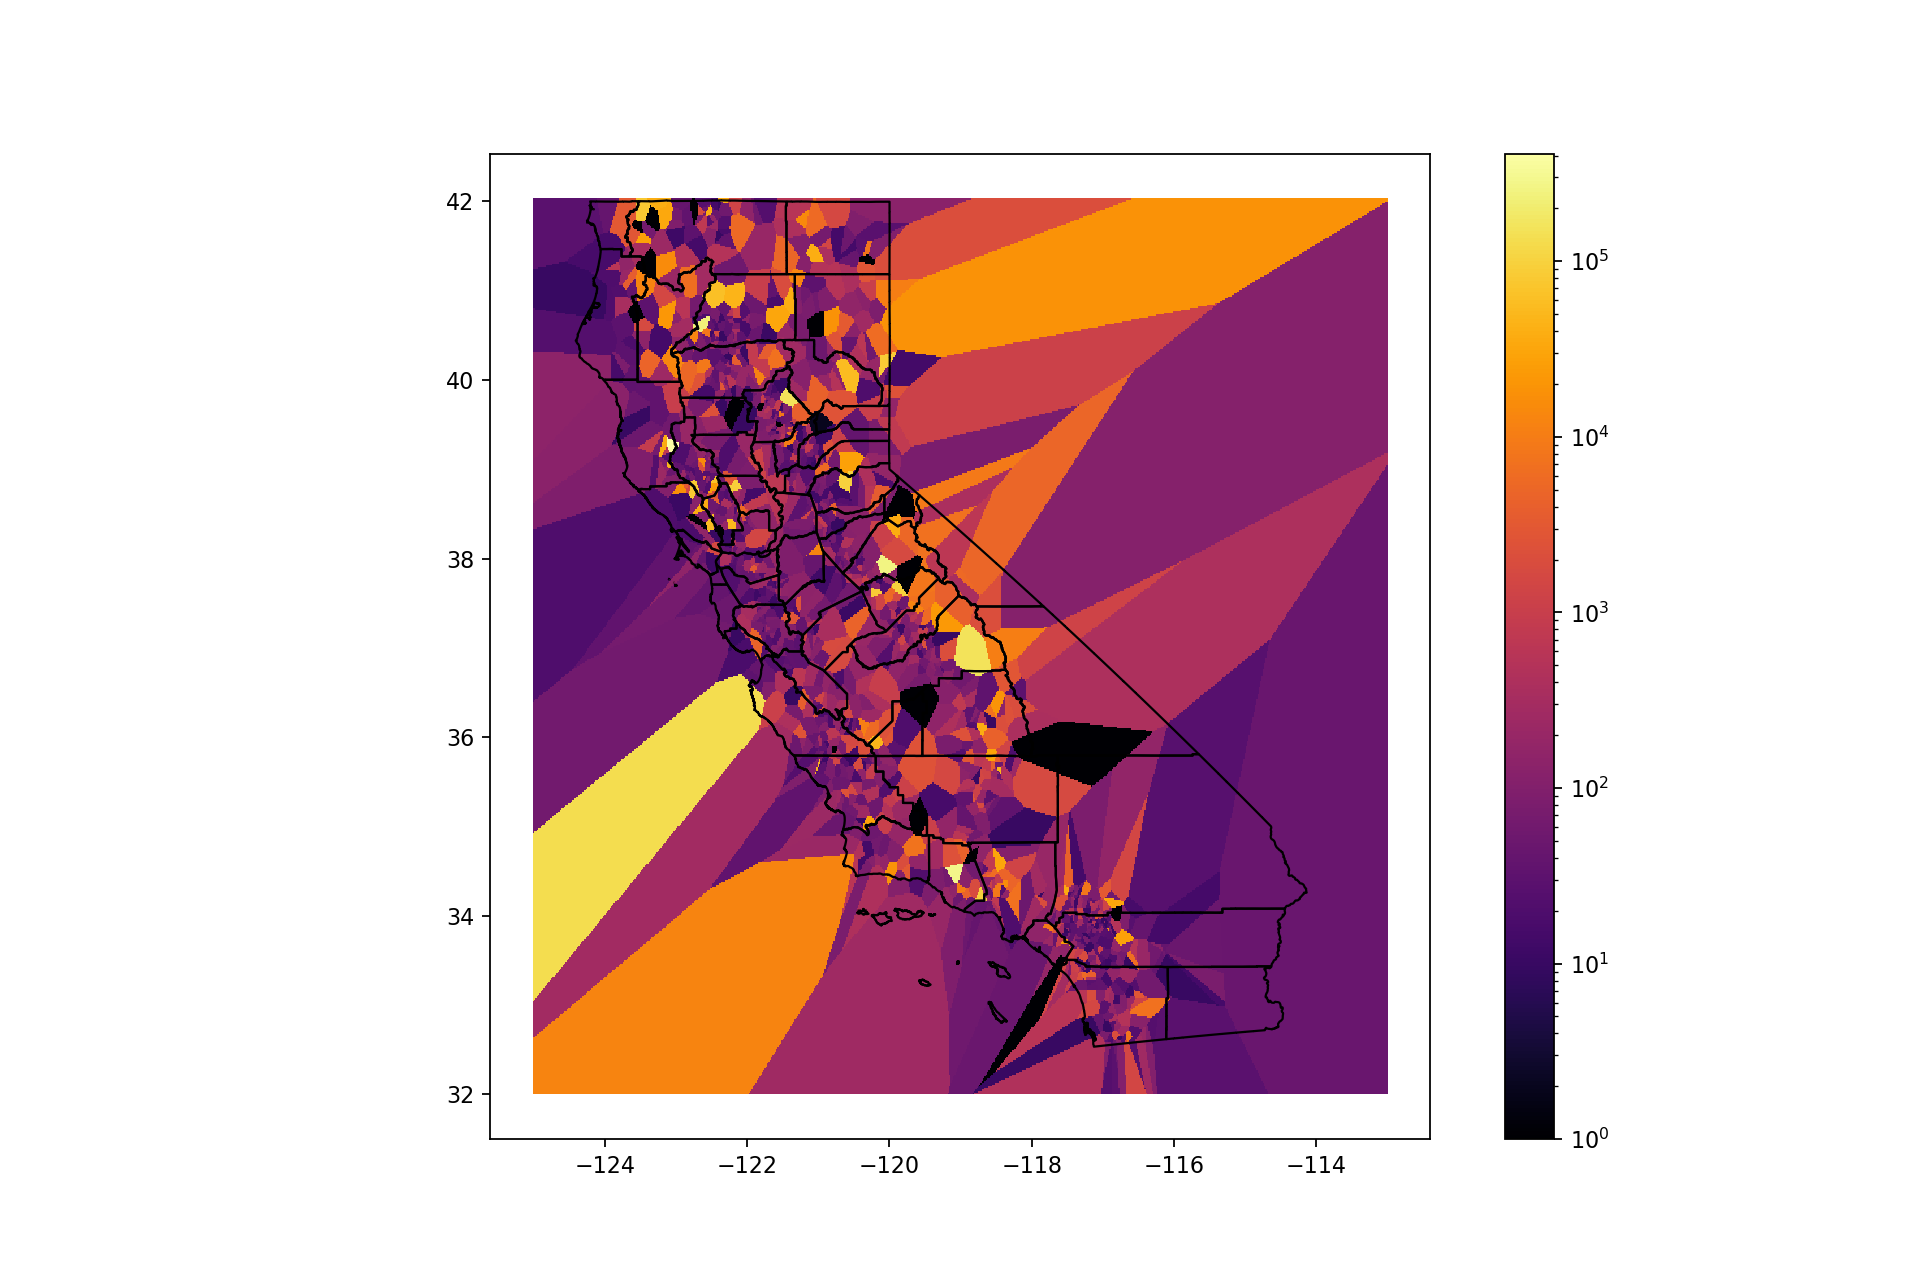

<Axes: >

In [136]:
%matplotlib notebook
cell["interpolated_value"] = griddata(points, values, xi, method='nearest')
ax = cell.plot(column='interpolated_value', figsize=(12, 8), norm=colors.LogNorm(vmin=cell["interpolated_value"].min(), vmax=cell["interpolated_value"].max()), cmap='inferno', legend=True)
plt.autoscale(False)
world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (12,8))

/Users/christopher/anaconda3/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


<IPython.core.display.Javascript object>


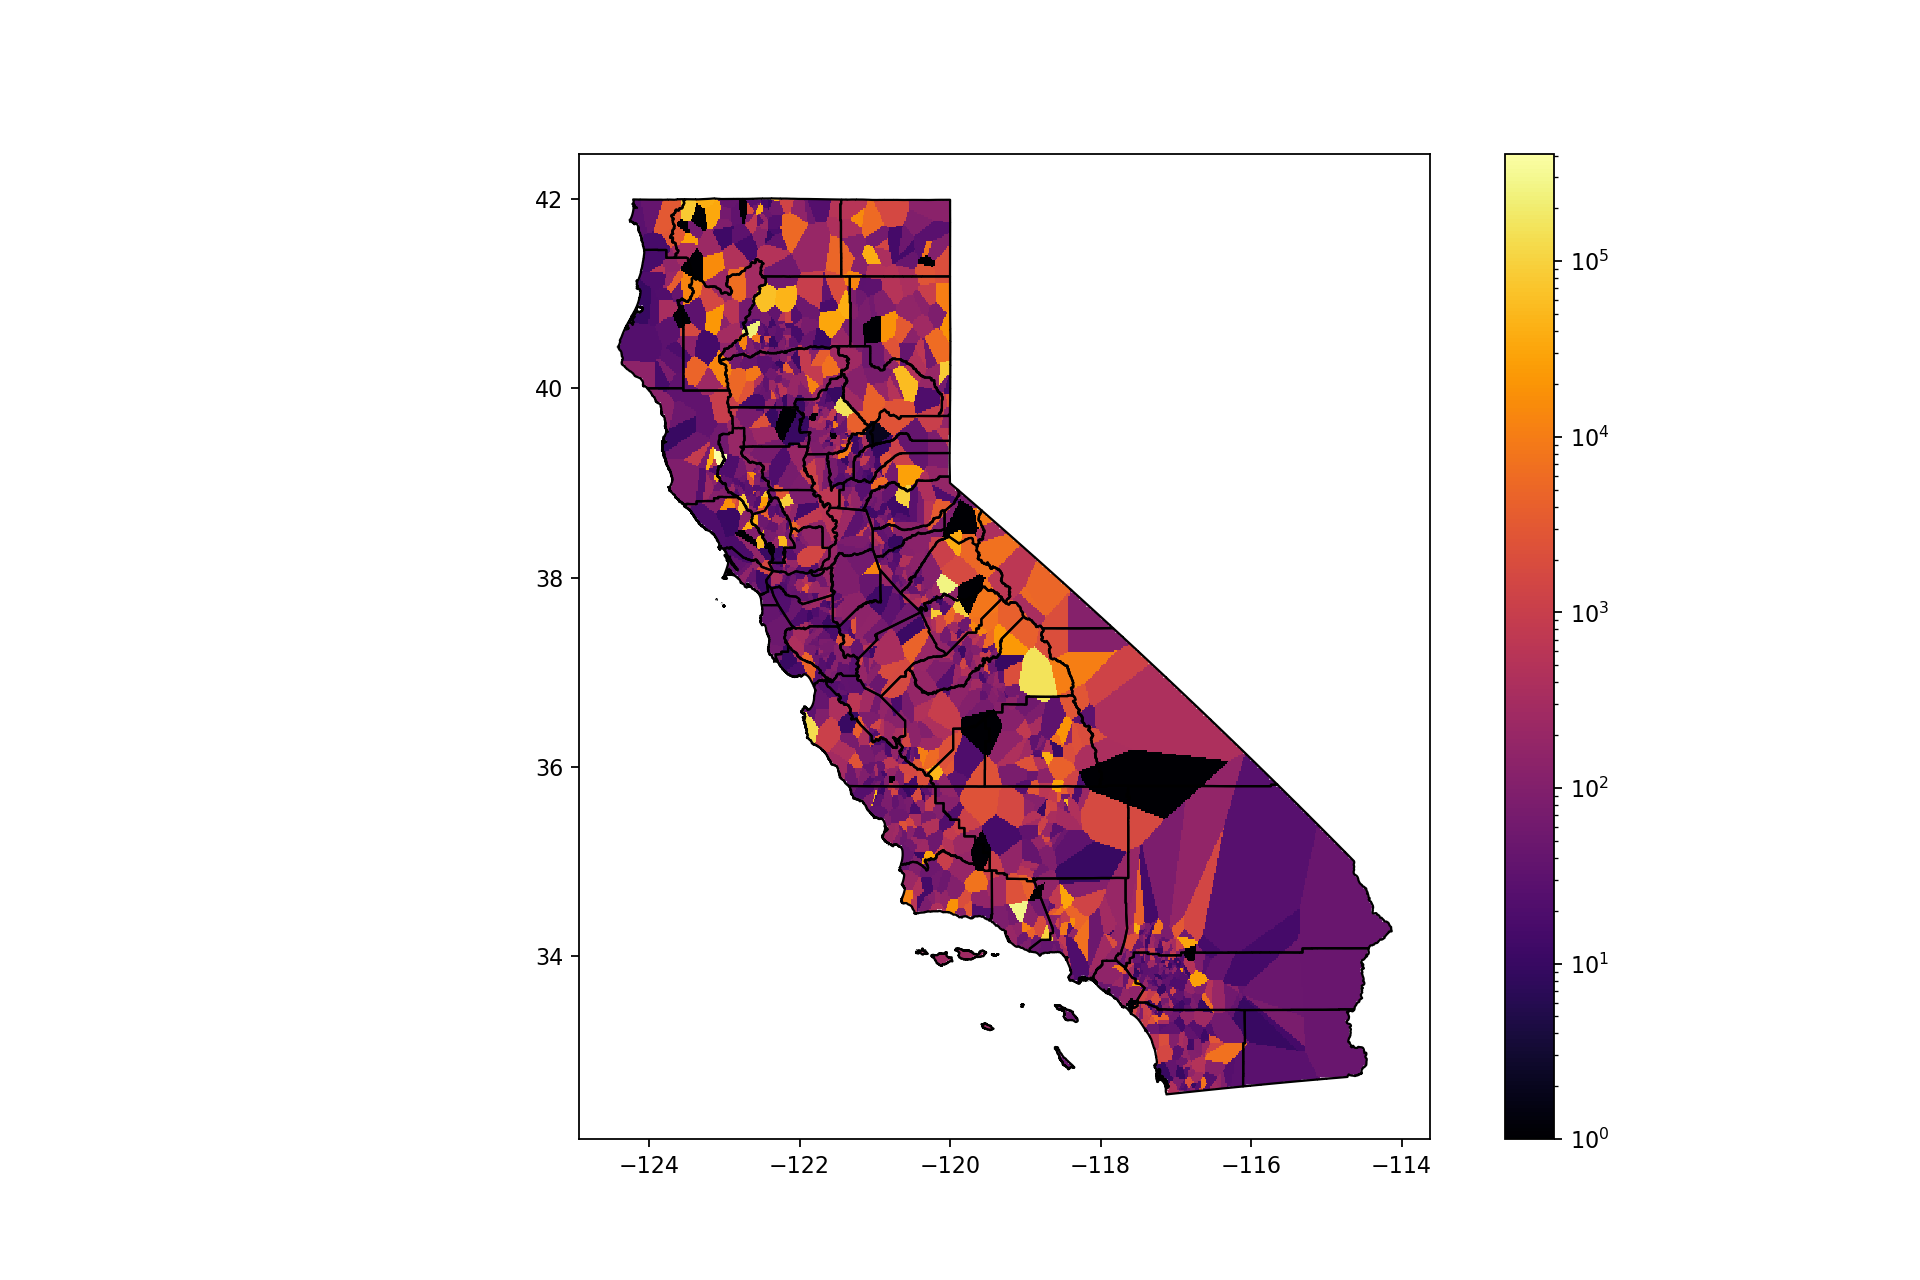

<Axes: >

In [137]:
ax = cell.clip(world).plot(column='interpolated_value', figsize=(12, 8), norm=colors.LogNorm(vmin=cell["interpolated_value"].min(), vmax=cell["interpolated_value"].max()), cmap='inferno', legend=True)
plt.autoscale(False)
world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (12,8))

/Users/christopher/anaconda3/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


<IPython.core.display.Javascript object>


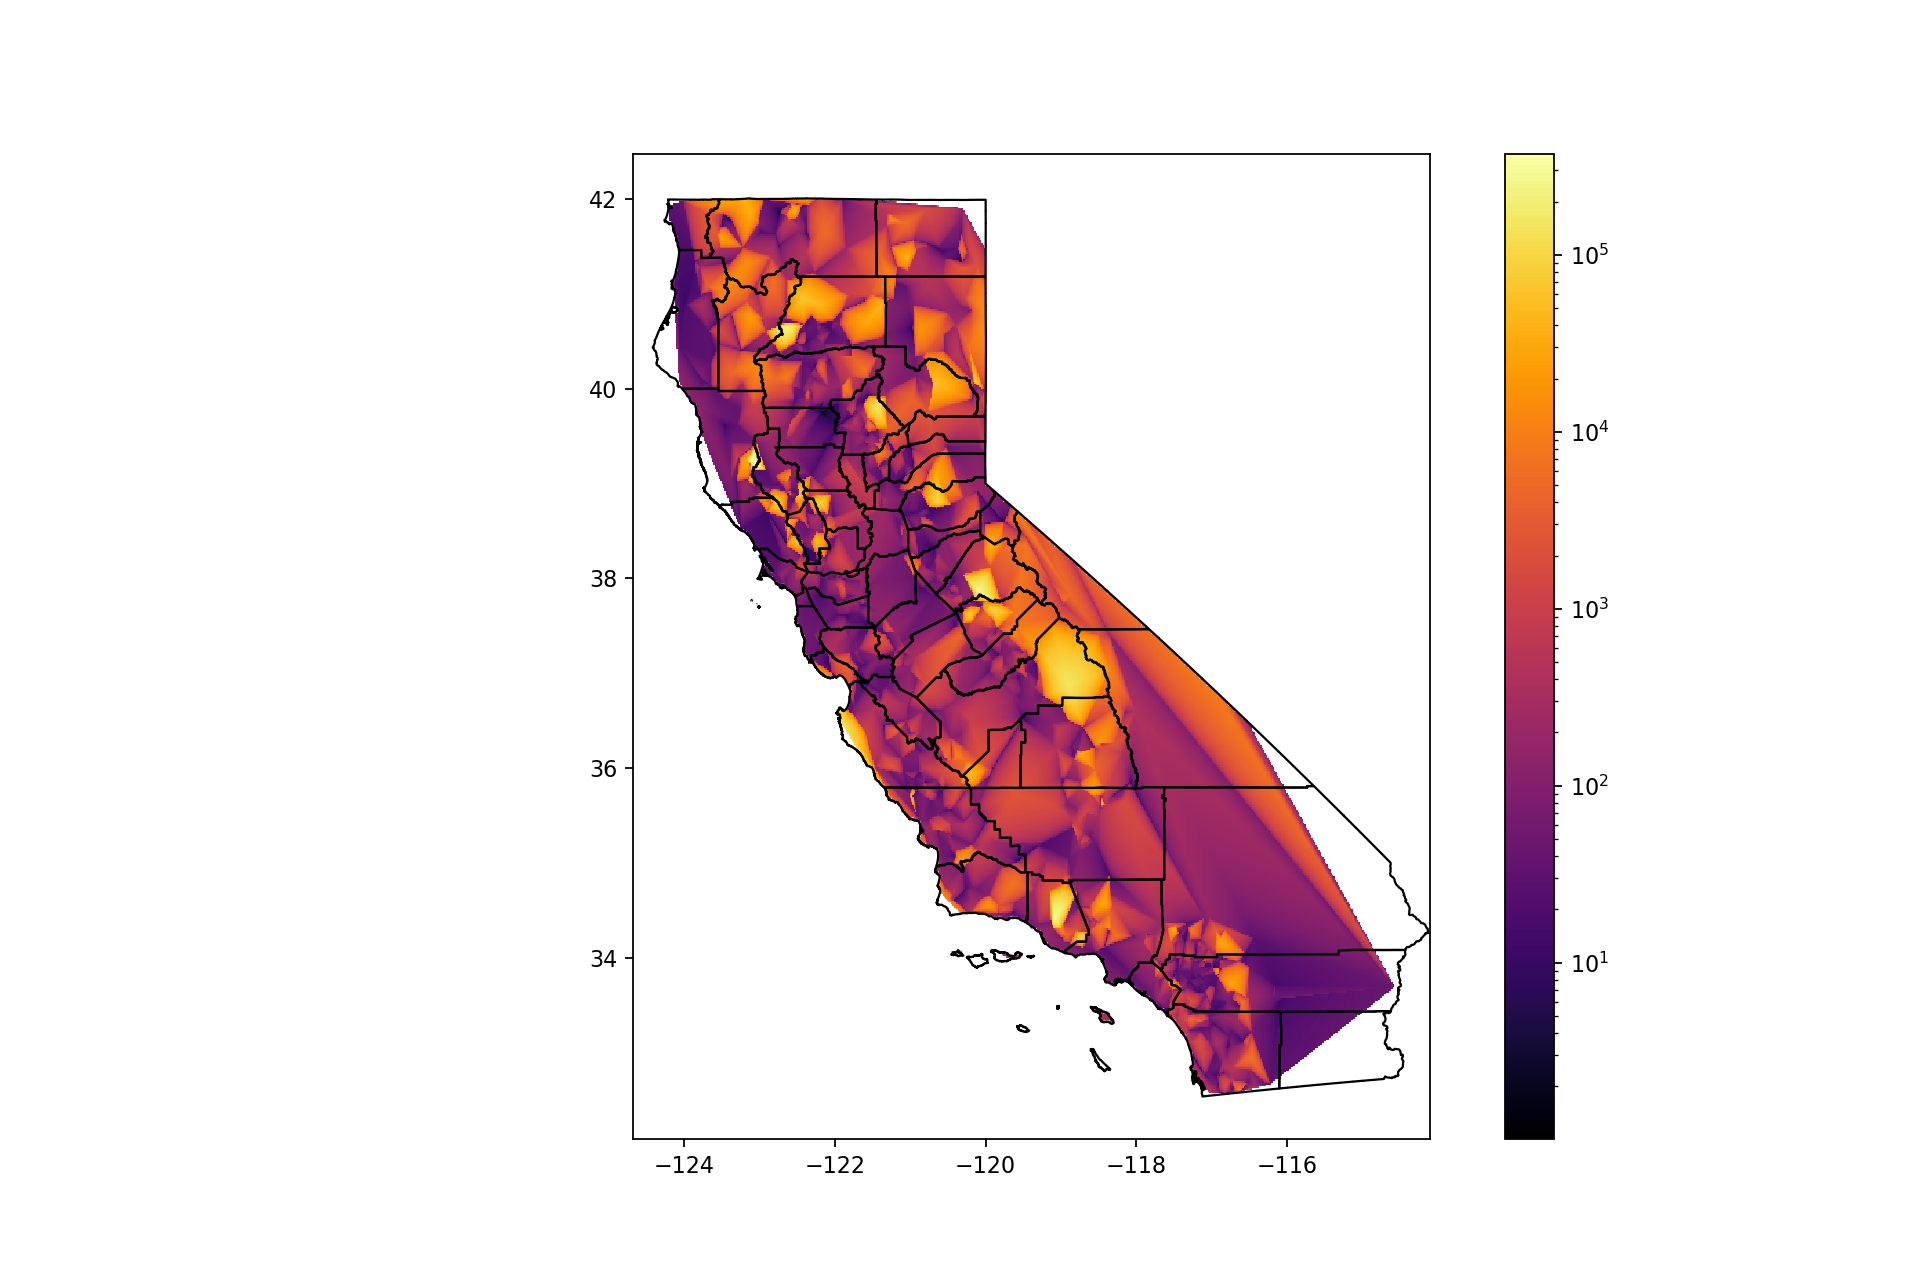

<Axes: >

In [138]:
cell["interpolated_value"] = griddata(points, values, xi, method='linear')
ax = cell.clip(world).plot(column='interpolated_value', figsize=(12, 8), norm=colors.LogNorm(vmin=cell["interpolated_value"].min(), vmax=cell["interpolated_value"].max()), cmap='inferno', legend=True)
plt.autoscale(False)
world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (12,8))

In [95]:
cell["interpolated_value"].max()

14685988.653634261

In [96]:
cell["interpolated_value"].min()

-7361417.632273718

<IPython.core.display.Javascript object>


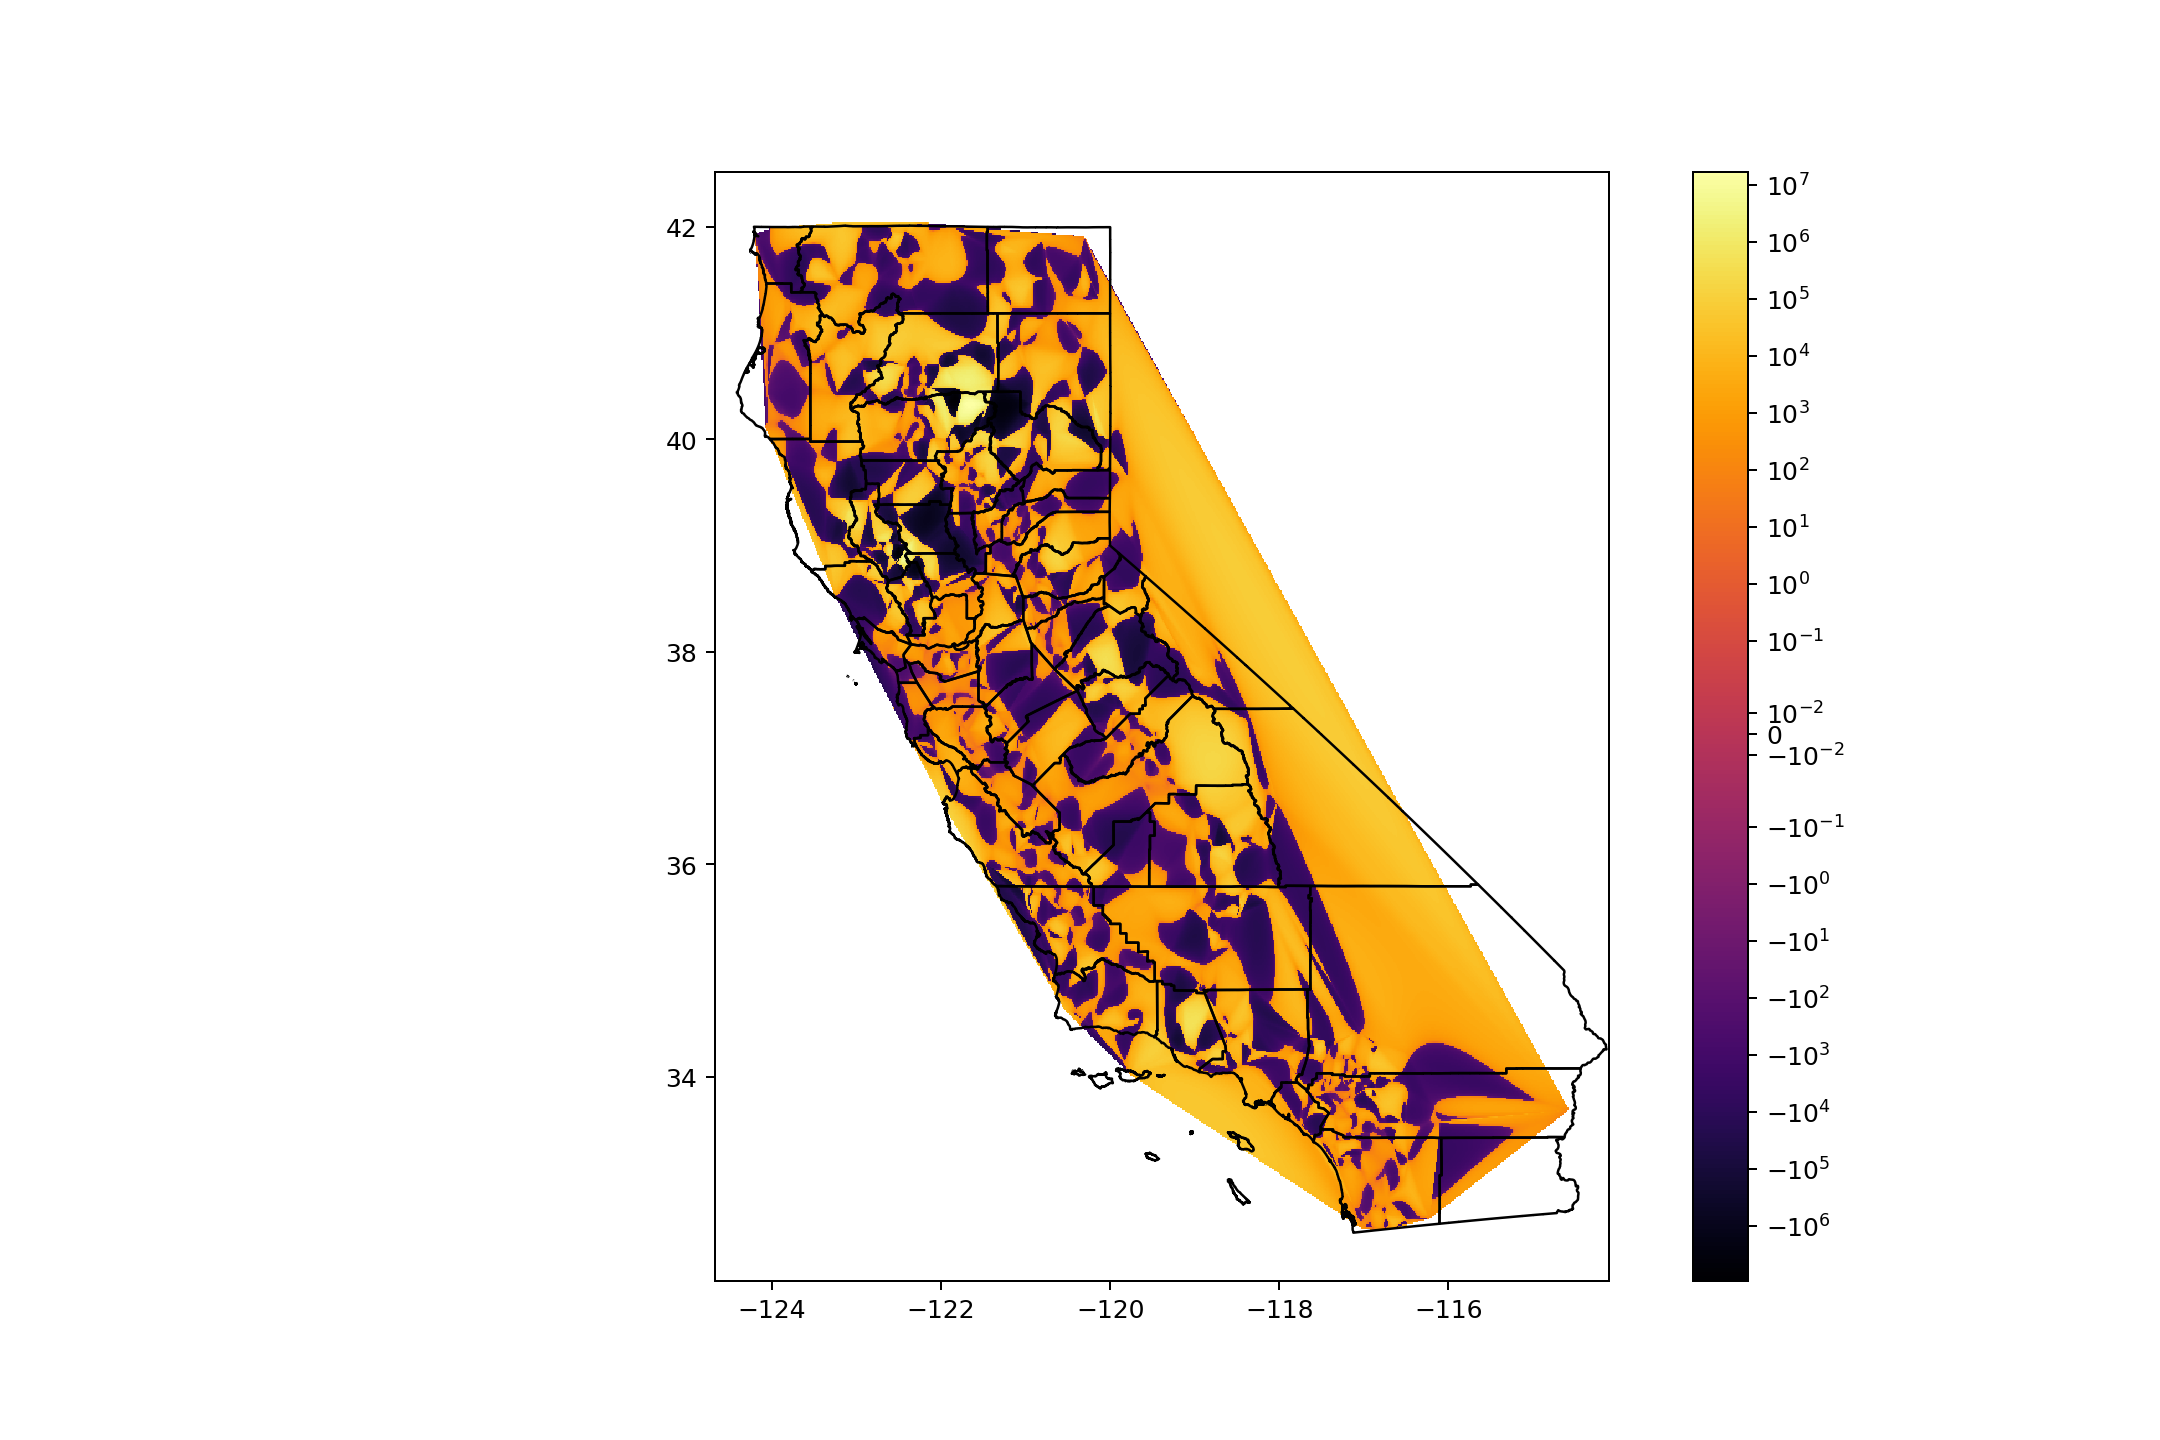

<Axes: >

In [128]:
cell["interpolated_value"] = griddata(points, values, xi, method='cubic')
ax = cell.plot(column='interpolated_value', figsize=(12, 8), norm=colors.SymLogNorm(linthresh=0.03, vmin=cell["interpolated_value"].min(), vmax=cell["interpolated_value"].max()), cmap='inferno', legend=True)
plt.autoscale(False)
world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (12,8))

# LOG SCALE DATA

In [140]:
points = np.array((fires_select["Longitude"], fires_select["Latitude"])).T
values = np.log(np.array(fire_gdf['AcresBurned']))
xi = np.array((cell["geometry"].to_crs('epsg:4326').centroid.x, cell["geometry"].to_crs('epsg:4326').centroid.y)).T

/var/folders/xt/52zb2sgj4q9f84tyf9cg1yf00000gn/T/ipykernel_53191/2004113278.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xi = np.array((cell["geometry"].to_crs('epsg:4326').centroid.x, cell["geometry"].to_crs('epsg:4326').centroid.y)).T


<IPython.core.display.Javascript object>


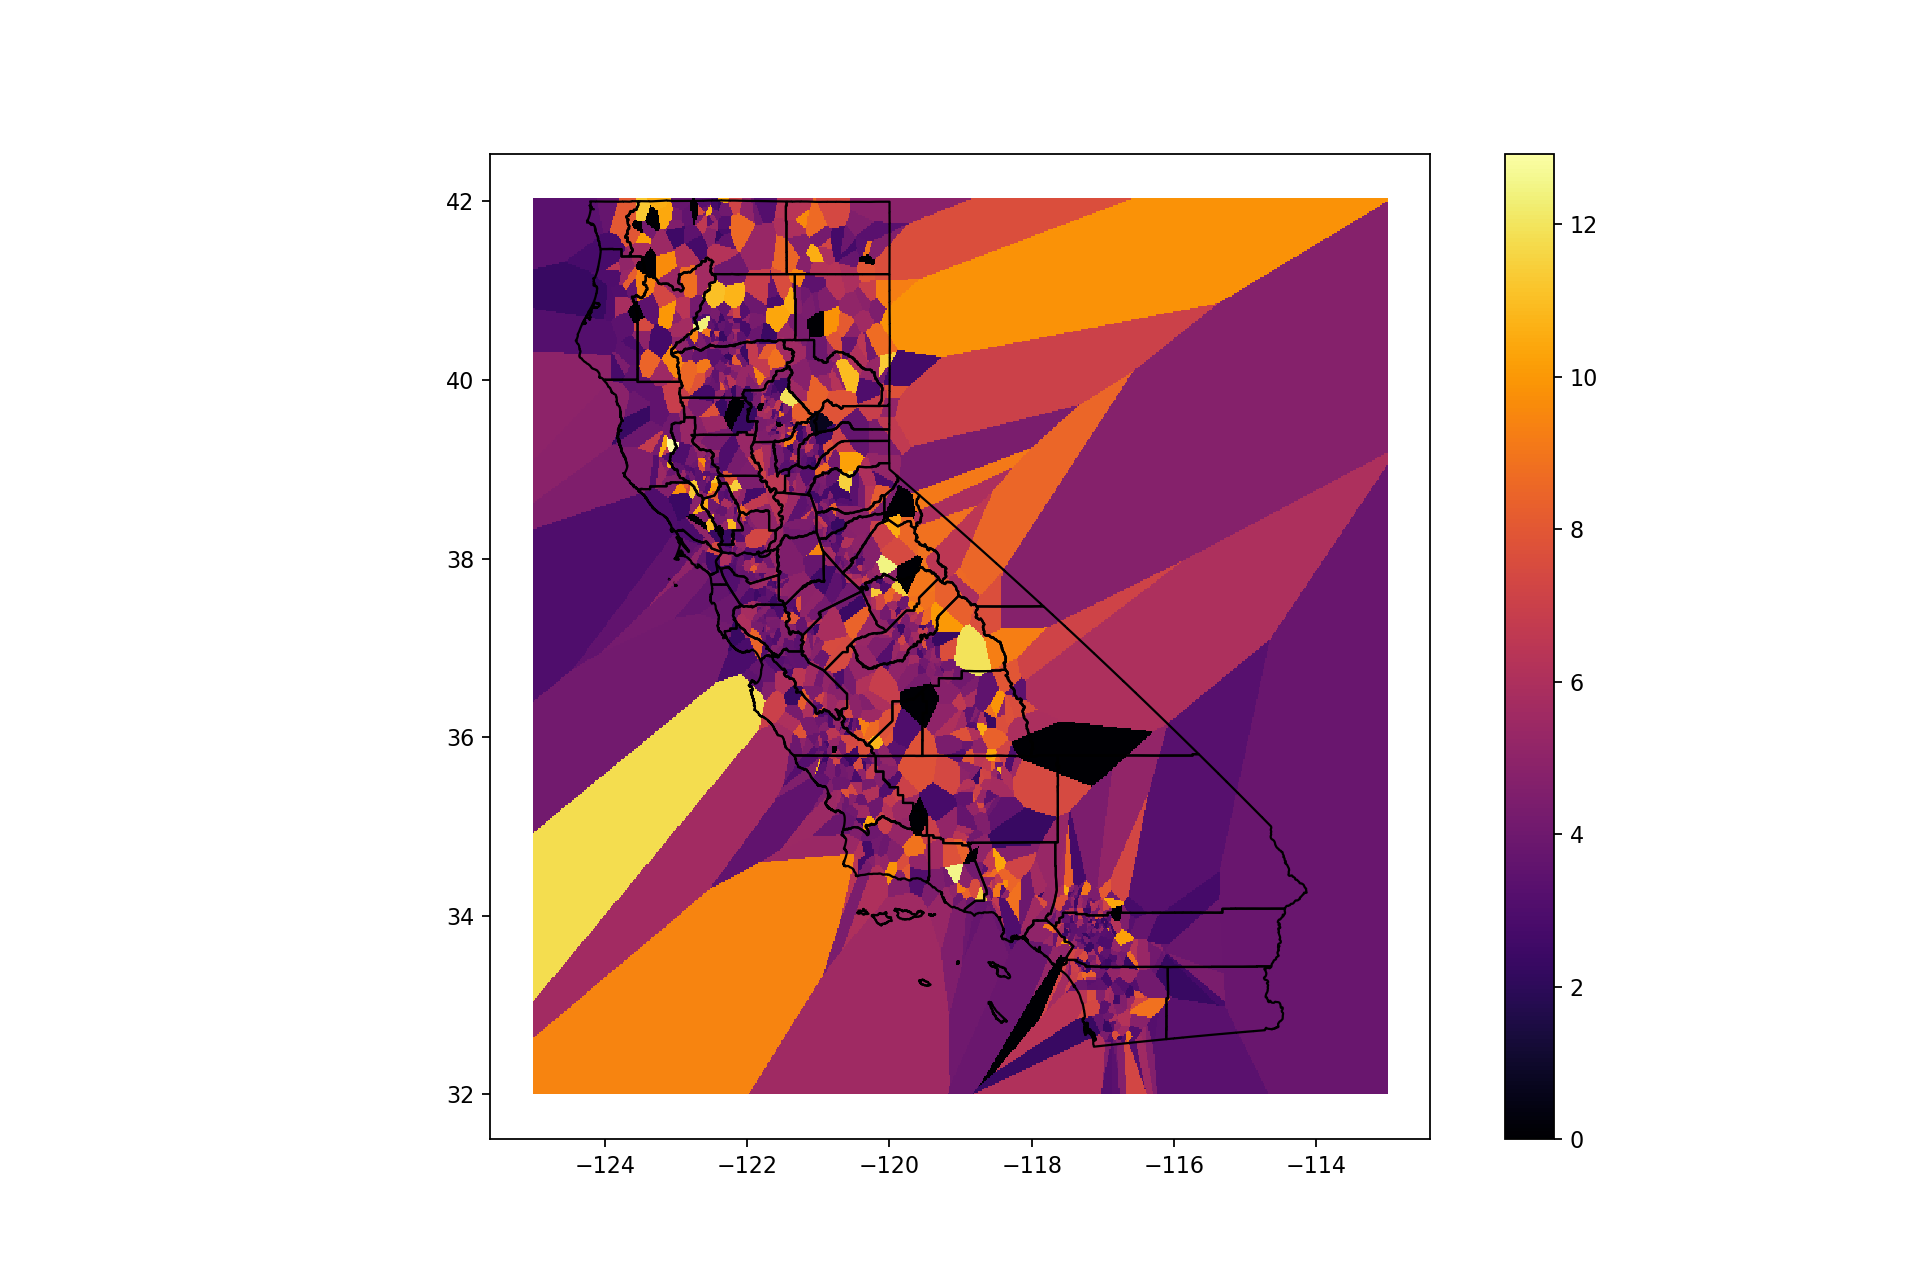

<Axes: >

In [141]:
cell["interpolated_value"] = griddata(points, values, xi, method='nearest')
ax = cell.plot(column='interpolated_value', figsize=(12, 8), cmap='inferno', legend=True)
plt.autoscale(False)
world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (12,8))

<Axes: >

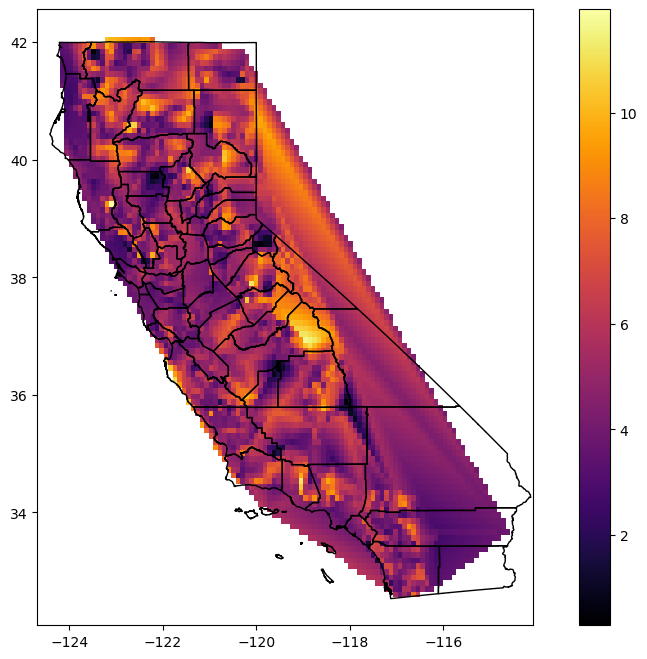

In [104]:
cell["interpolated_value"] = griddata(points, values, xi, method='linear')
ax = cell.plot(column='interpolated_value', figsize=(12, 8), cmap='inferno', legend=True)
plt.autoscale(False)
world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (12,8))

<Axes: >

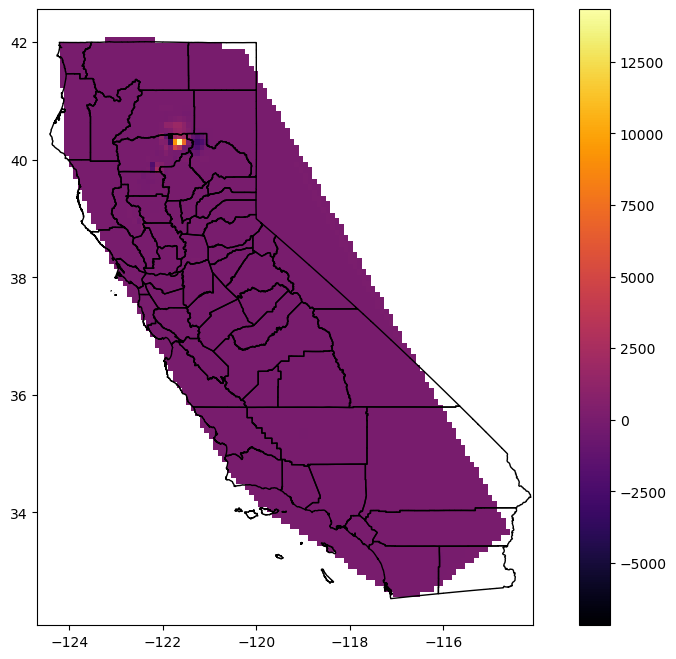

In [105]:
cell["interpolated_value"] = griddata(points, values, xi, method='cubic')
ax = cell.plot(column='interpolated_value', figsize=(12, 8), cmap='inferno', legend=True)
plt.autoscale(False)
world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (12,8))